# Author - Gaurav Khampariya

# Task name - Prediction using Supervised ML

In this this project we will predict the percentage of student based on no.of hours studied 
using simple linear regression which involves only two variables.

Libraries used - Pandas,Numpy,Matplotlib,scikit learn

In [25]:
#importing libraries reqquired

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Reading Data

In [2]:
url = 'http://bit.ly/w-data'

In [3]:
df = pd.read_csv(url)

In [4]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Visualising data

In [26]:
#plotting scatter plot to see distribution of scores

In [5]:
x = df['Hours']
y = df['Scores']

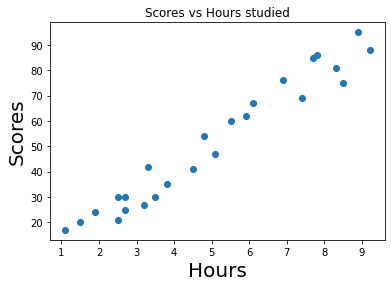

In [6]:
plt.scatter(x,y)
plt.xlabel('Hours',fontsize = 20)
plt.ylabel('Scores',fontsize = 20)
plt.title('Scores vs Hours studied')
plt.show()

# Preparing data

In [7]:
X = x.values.reshape(-1,1)
Y = y.values.reshape(-1)

In [27]:
#Splitting the data into training and test sets using scikit learn.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y,test_size = 0.2,random_state = 0)

# Training the Algorithm

In [28]:
#after splitting the data into training and test sets we will train our algorithm 

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
reg = LinearRegression()

In [12]:
reg.fit(X_train,Y_train)
print('Training complete')

Training complete


In [13]:
# Plotting the regression line
line = reg.coef_*X + reg.intercept_

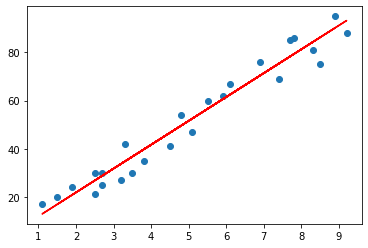

In [14]:
# Plotting for the test data
plt.scatter (x,y)
plt.plot (x, line, color = 'Red')
plt.show()

In [15]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Making predictions

In [29]:
#after training the algorithm ,time to make some predictions

In [16]:
y_predict = reg.predict(X_test)

In [17]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_predict})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Testing on our own data

In [20]:
hours = 9.5
test_pred = np.array([hours])
test_pred = test_pred.reshape(-1,1)
own_prediction = reg.predict(test_pred)
print(f'No. of ours {hours}')
print(f'Predicted score {own_prediction}')

No. of ours 9.5
Predicted score [96.16939661]


# Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_predict)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_predict))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
